In [1]:
library(dplyr)
library(lubridate)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [3]:
observations <- read.csv("../observations.csv")
head(observations)

,ID.OMM.station,Date,Pression.au.niveau.mer,Variation.de.pression.en.3.heures,Type.de.tendance.barométrique,Direction.du.vent.moyen.10.mn,Vitesse.du.vent.moyen.10.mn,Température,Point.de.rosée,Humidité,⋯,Température...C.,Température.minimale.sur.12.heures...C.,Température.minimale.sur.24.heures...C.,Température.maximale.sur.12.heures...C.,Température.maximale.sur.24.heures...C.,Température.minimale.du.sol.sur.12.heures..en..C.,Latitude,Longitude,Altitude,mois_de_l_annee
,<int>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,7181,2016-07-12T11:00:00+02:00,101410,-30,8,230,2.9,293.35,286.55,65,⋯,20.2,NA,NA,NA,NA,15.8,48.581000,5.959833,336,7
2,81405,2017-01-08T07:00:00+01:00,101140,-140,8,240,0.5,297.25,296.25,94,⋯,24.1,NA,NA,NA,NA,25.0,4.822333,-52.365333,4,1
3,7627,2017-01-08T13:00:00+01:00,103380,-40,8,30,2.1,277.55,269.75,57,⋯,4.4,NA,NA,NA,NA,-2.8,43.005333,1.106833,414,1
4,78894,2017-01-09T13:00:00+01:00,101760,0,NA,100,2.3,298.15,291.35,66,⋯,25.0,NA,23.8,NA,29.2,NA,17.901500,-62.852167,44,1
5,7020,2017-01-12T13:00:00+01:00,100580,-710,8,210,11.9,282.05,280.15,88,⋯,8.9,NA,NA,NA,NA,NA,49.725167,-1.939833,6,1
6,7280,2017-12-23T13:00:00+01:00,103830,-10,0,10,2.7,280.75,278.35,85,⋯,7.6,NA,NA,NA,NA,2.7,47.267833,5.088333,219,12


In [4]:
# Filtrer uniquement la métropole
observations <- observations %>%
  filter(Latitude >= 41 & Latitude <= 51,
         Longitude >= -5 & Longitude <= 10)

# Vérif rapide
summary(observations$Latitude)
summary(observations$Longitude)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  41.92   43.91   46.59   46.25   48.45   50.57 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -4.412   0.000   2.384   2.431   5.078   9.485 

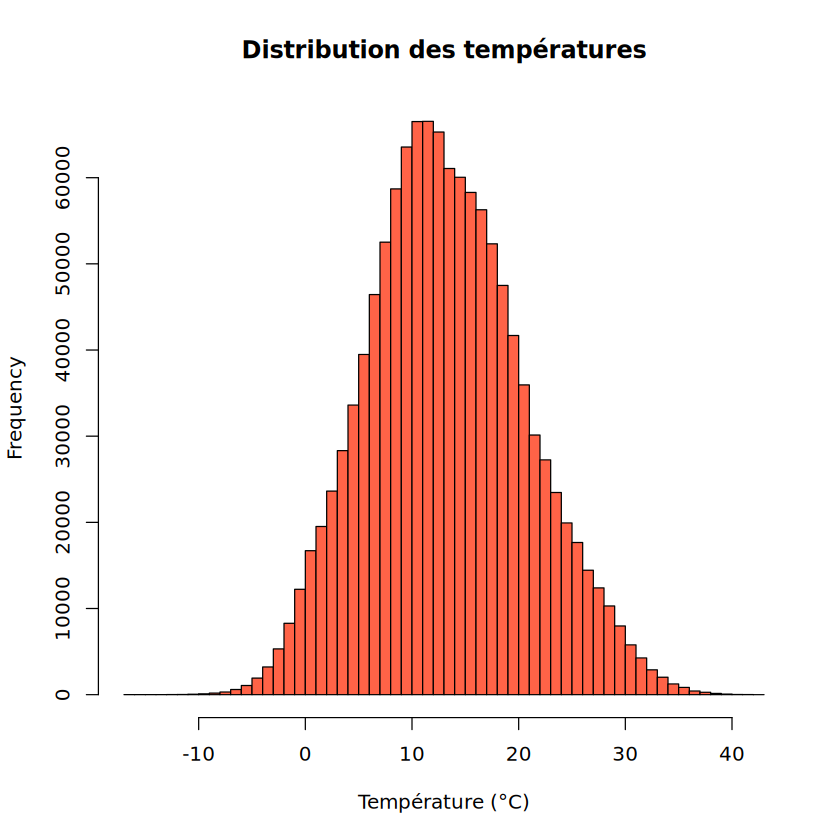

In [5]:
par(bg = 'white')
temp_C <- observations$Température - 273.15
hist(temp_C, breaks = 50, col = "tomato", main = "Distribution des températures", xlab = "Température (°C)")


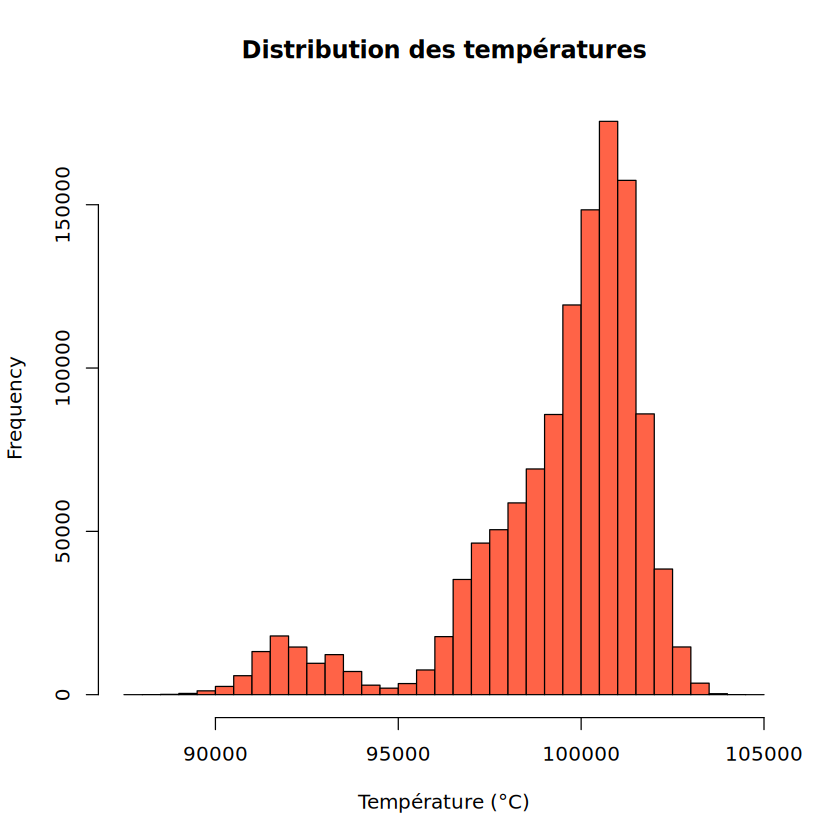

In [6]:
par(bg = 'white')
temp_C <- observations$Pression.station - 273.15
hist(temp_C, breaks = 50, col = "tomato", main = "Distribution des températures", xlab = "Température (°C)")

In [12]:
spring <- subset(observations, mois_de_l_annee %in% c(4,5,6))$Température
fall <- subset(observations, mois_de_l_annee %in% c(9,10,11))$Température

In [ ]:
mean(spring, na.rm=TRUE)

[1] 288.5821

In [17]:
mean(fall, na.rm=TRUE)

[1] 286.8119

In [18]:
print(cat("mean(spring) =",mean(spring, na.rm=TRUE)))
print(cat("mean(fall) =", mean(fall, na.rm=TRUE)))
t.test(spring, mu = mean(fall, na.rm=TRUE))

mean(spring) = 288.5821NULL
mean(fall) = 286.8119NULL



	One Sample t-test

data:  spring
t = 162.04, df = 298470, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 286.8119
95 percent confidence interval:
 288.5607 288.6035
sample estimates:
mean of x 
 288.5821 


In [20]:
observations$Date <- as.POSIXct(observations$Date, format="%Y-%m-%dT%H:%M:%S", tz="UTC")
temp_jour <- observations %>%
  mutate(jour = as.Date(Date)) %>%
  group_by(jour) %>%
  summarise(temp_moy = mean(Température, na.rm = TRUE))

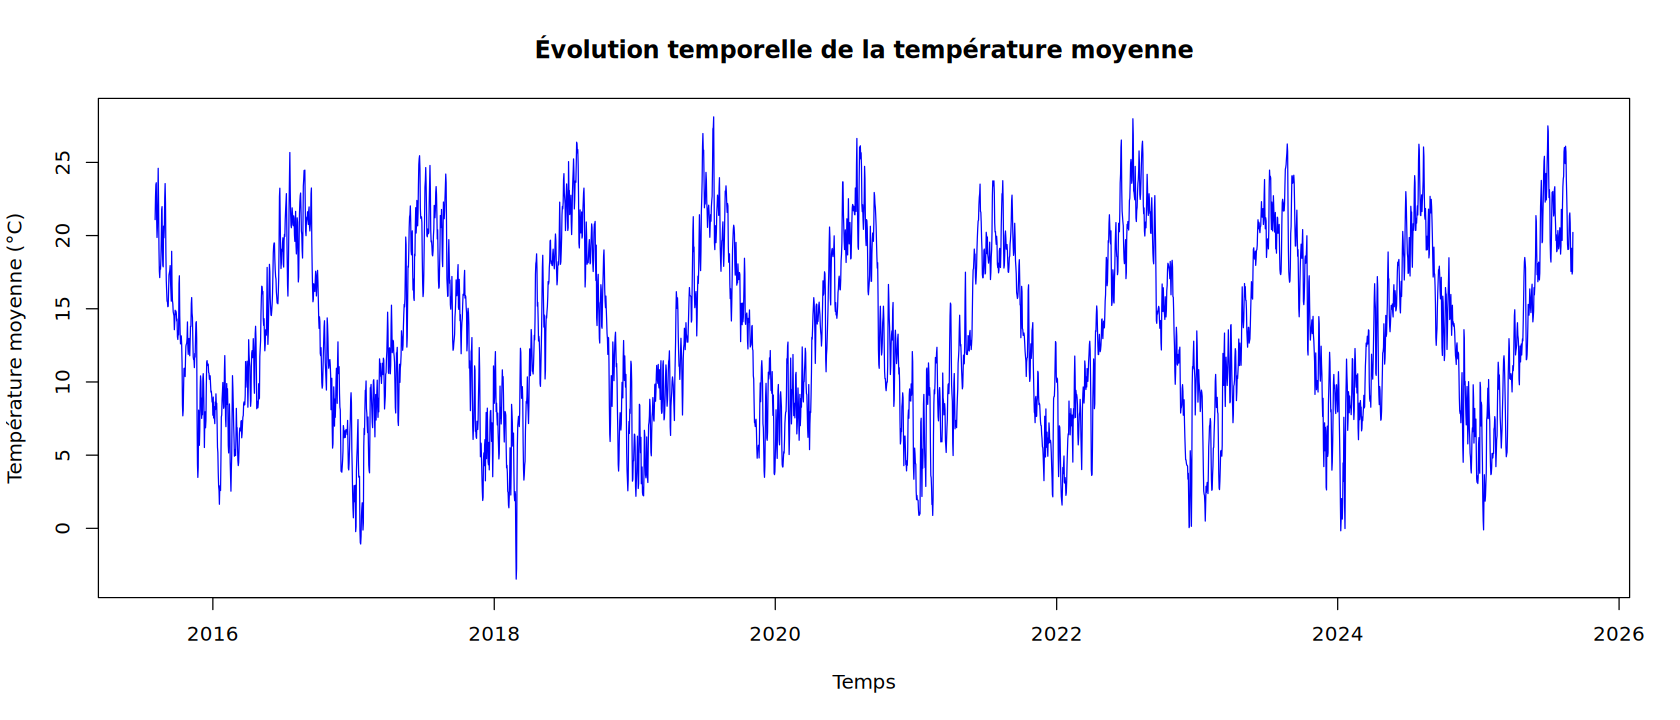

In [21]:
options(repr.plot.width=14, repr.plot.height=6)
par(bg = 'white')
plot(temp_jour$jour, temp_jour$temp_moy - 273.15, type="l",
     col="blue", xlab="Temps", ylab="Température moyenne (°C)",
     main="Évolution temporelle de la température moyenne")


In [12]:
temp_jour$t <- as.numeric(temp_jour$jour - min(temp_jour$jour))

In [13]:
fit <- nls(temp_moy ~ a + b * sin(2*pi*t/365 + phi),
           data = temp_jour,
           start = list(a = mean(temp_jour$temp_moy, na.rm=TRUE),
                        b = 10,   # amplitude approx
                        phi = 0)) # phase
summary(fit)


Formula: temp_moy ~ a + b * sin(2 * pi * t/365 + phi)

Parameters:
      Estimate Std. Error t value Pr(>|t|)    
a   286.410236   0.042714  6705.3   <2e-16 ***
b     7.761046   0.060248   128.8   <2e-16 ***
phi  -4.537104   0.007804  -581.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.592 on 3681 degrees of freedom

Number of iterations to convergence: 7 
Achieved convergence tolerance: 1.127e-08


In [17]:
fit_free <- nls(temp_moy ~ a + b * sin(2*pi*f*t + phi),
                data = temp_jour,
                start = list(a = mean(temp_jour$temp_moy, na.rm=TRUE),
                             b = 10,   # amplitude approx
                             f = 1/365, # fréquence initiale
                             phi = 0))
summary(fit_free)
print(1/coef(fit_free)["f"])


Formula: temp_moy ~ a + b * sin(2 * pi * f * t + phi)

Parameters:
      Estimate Std. Error t value Pr(>|t|)    
a    2.864e+02  4.278e-02  6695.5   <2e-16 ***
b    7.765e+00  6.023e-02   128.9   <2e-16 ***
f    2.737e-03  1.175e-06  2328.9   <2e-16 ***
phi -4.503e+00  1.555e-02  -289.6   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.59 on 3680 degrees of freedom

Number of iterations to convergence: 7 
Achieved convergence tolerance: 2.076e-06


       f 
365.3959 


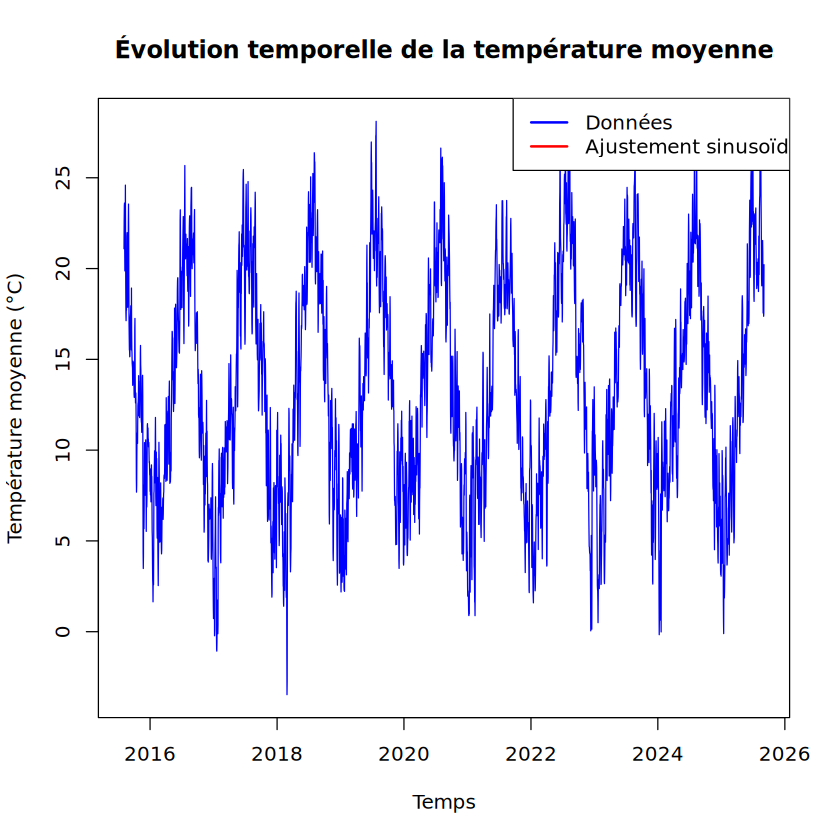

In [18]:
par(bg = 'white')
plot(temp_jour$jour, temp_jour$temp_moy - 273.15, type="l",
     col="blue", xlab="Temps", ylab="Température moyenne (°C)",
     main="Évolution temporelle de la température moyenne")
lines(temp_jour$jour, predict(fit), col="red", lwd=2)
legend("topright", legend=c("Données", "Ajustement sinusoïdal"), col=c("blue","red"), lwd=2)


In [19]:
# Ajouter la colonne "année"
observations$annee <- year(as.Date(observations$Date))

# Définir les groupes de 3 ans
observations$periode <- cut(observations$annee,
                            breaks = c(2014, 2017, 2020, 2023, 2026),
                            labels = c("2015-2017", "2018-2020", "2021-2023", "2024"))

# Calculer la moyenne spatiale + temporelle par période
moyennes_periode <- observations %>%
  group_by(periode) %>%
  summarise(temp_moy = mean(Température, na.rm = TRUE))

print(moyennes_periode)

# ANOVA : température en fonction de la période
anova_res <- aov(Température ~ periode, data = observations)
summary(anova_res)

# A tibble: 4 × 2
  periode   temp_moy
  <fct>        <dbl>
1 2015-2017     286.
2 2018-2020     287.
3 2021-2023     287.
4 2024          287.


                 Df   Sum Sq Mean Sq F value Pr(>F)    
periode           3    92372   30791   571.4 <2e-16 ***
Residuals   1208814 65137380      54                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
17973 observations deleted due to missingness

In [ ]:
# Tirer un échantillon si dataset énorme (ex : 5000 valeurs)
set.seed(123)
temp_sample <- sample(observations$Température, 5000)
# temp_sample <- scale(temp_sample)
# Test de Shapiro-Wilk
shapiro.test(temp_sample)



	Shapiro-Wilk normality test

data:  temp_sample
W = 0.99665, p-value = 4.533e-09


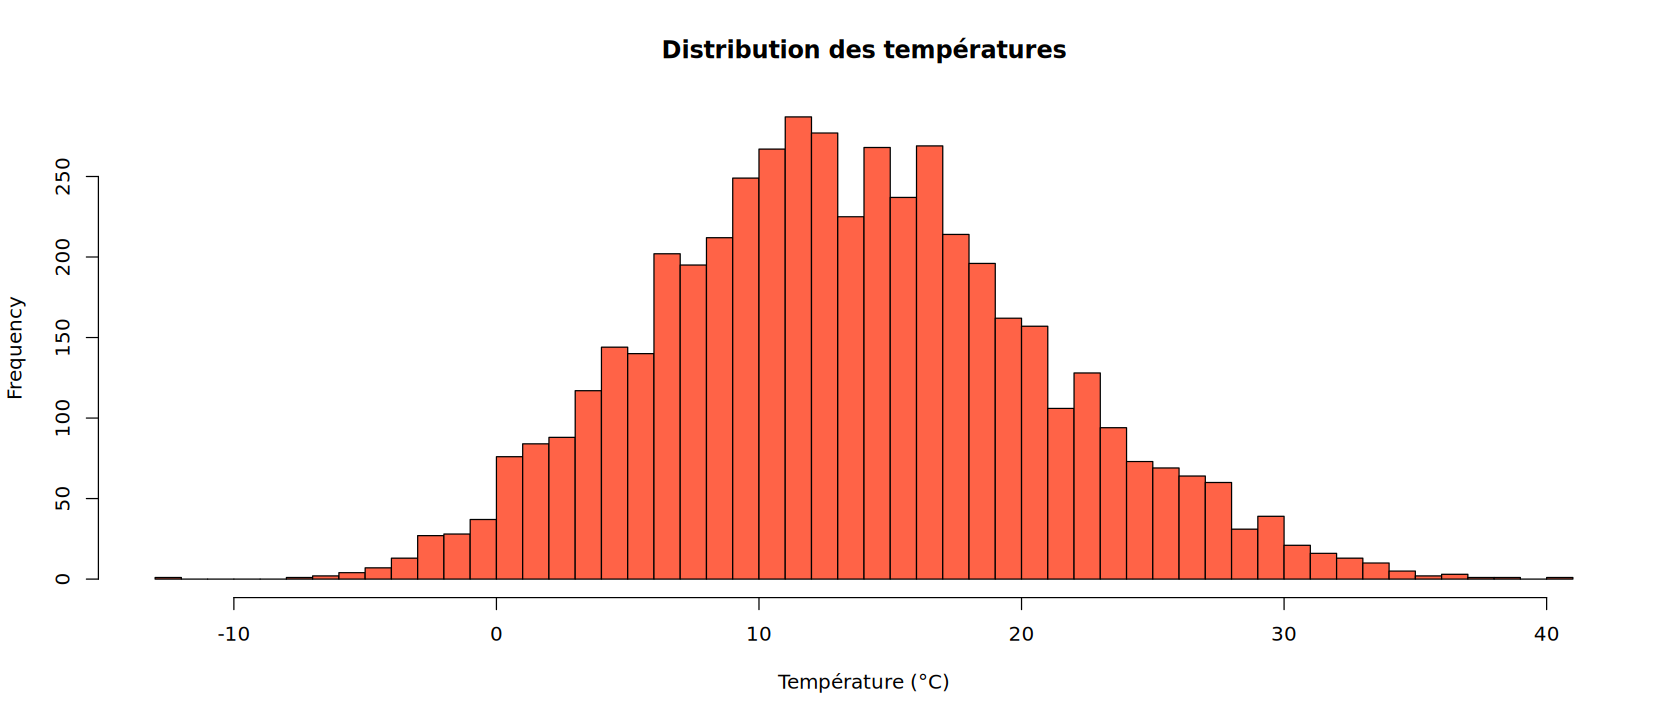

In [25]:
par(bg = 'white')
temp_sample_C <- temp_sample - 273.15
hist(temp_sample_C, breaks = 50, col = "tomato", main = "Distribution des températures", xlab = "Température (°C)")

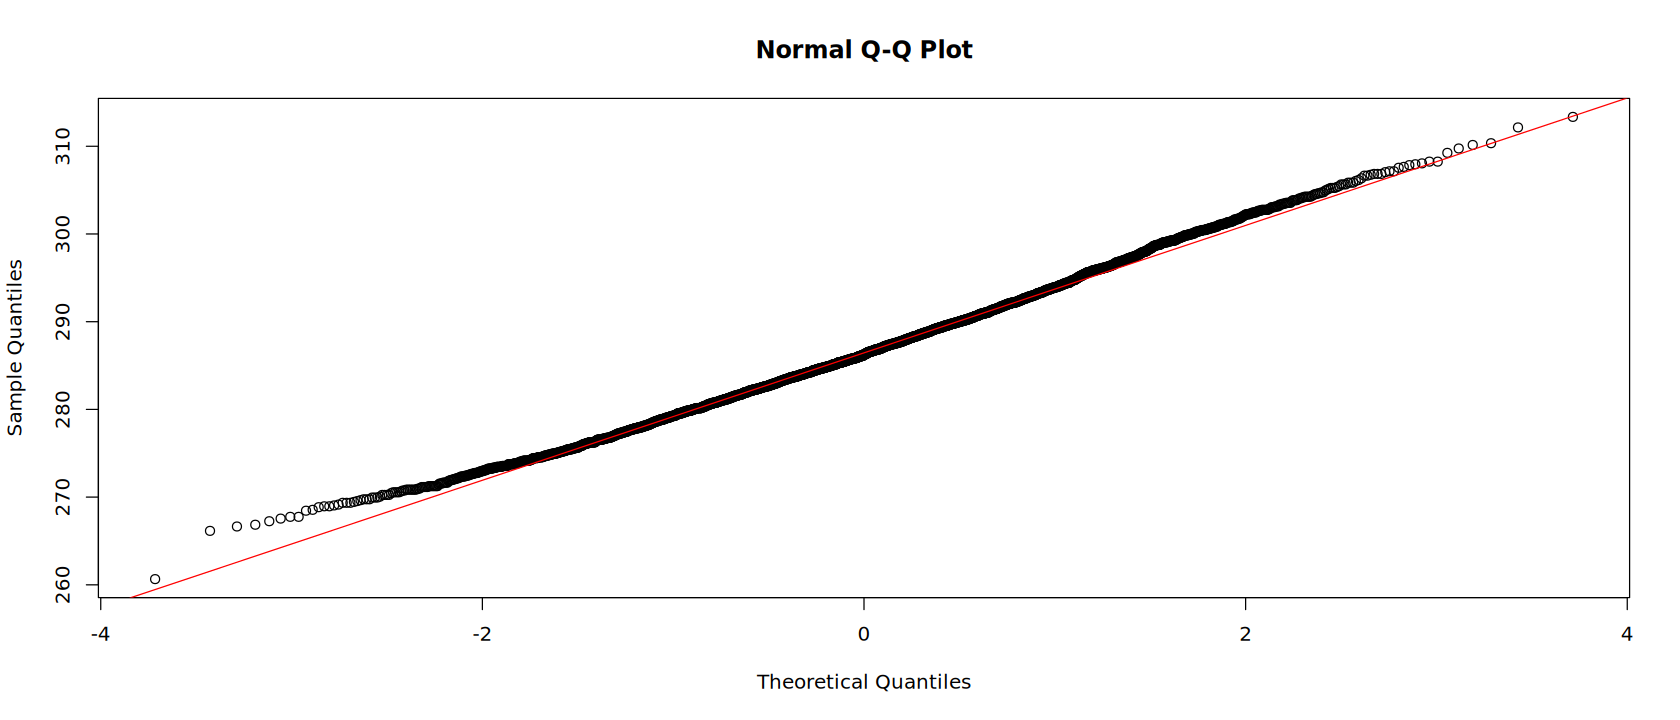

In [26]:
par(bg ='white')
qqnorm(temp_sample)
qqline(temp_sample, col = "red")

In [ ]:
observations$Date <- as.POSIXct(observations$Date,
                                format = "%Y-%m-%dT%H:%M:%S",
                                tz = "UTC")

temp_21dec <- observations %>%
  filter(format(Date, "%m-%d") == "12-21") %>%
  mutate(annee = format(Date, "%Y")) %>%
  group_by(annee) %>%
  summarise(temp_moy = mean(Température, na.rm = TRUE),
            .groups = "drop")

temp_21dec_moy <- temp_21dec$temp_moy
temp_21dec_moy <- scale(temp_21dec_moy)

shapiro.test(temp_21dec_moy)


	Shapiro-Wilk normality test

data:  temp_21dec_moy
W = 0.85084, p-value = 0.05944



	Shapiro-Wilk normality test

data:  temp_sample
W = 0.96734, p-value < 2.2e-16
